In [1]:
import scanpy as sc
import anndata
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import sys
sys.path.insert(0,"../helper_functions")
import gene_enrichment_helpers as gh
import plotting_helpers as ph
import bm_data_functions as bm
import gseapy as gp


In [ ]:
#---old

sys.path.insert(0,"/data/cb/nyquist/breast_milk/breastMilk/")
import heatmap_helper_functions as hh
import gene_enrichment as gr
import importlib
sys.path.insert(0,"/data/cb/nyquist/cd8_deplete/")

import condition_plotting_helpers
import gseapy as gp
sys.path.insert(0,"/data/cb/scratch/nyquist/deeper_sequencing_analysis")
import figure_making_plots as fmp



In [2]:
print("Scanpy version " + sc.__version__)
print("Pandas version " +pd.__version__)
print("Numpy version "+np.__version__)

Scanpy version 1.7.2
Pandas version 1.1.5
Numpy version 1.19.2


In [3]:
adata_all_epi = sc.read_h5ad("../../Data/processed_data/all_timepoints/adata_epithelial_no_doublets_FINAL.h5ad")
fig4_dir = "../../Results/plots/Figure_4/"

In [4]:
plt.rcParams["figure.figsize"]=(6,6)


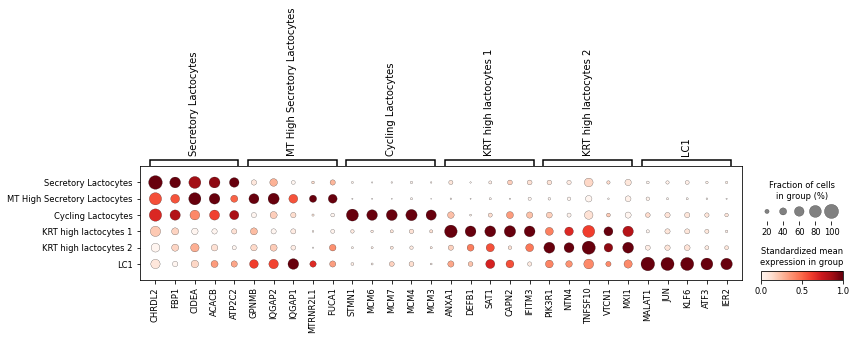

In [5]:
# Marker genes plot
# code to generate marker genes in Pseudobulk_Differential_Expression.ipynb notebook
epi_pseudobulk_markers_folder = "../../Results/tables/Epithelial_Celltype_Pseudobulk_Marker_Genes/"

cluster_order = ["Secretory Lactocytes","MT High Secretory Lactocytes","Cycling Lactocytes","KRT high lactocytes 1","KRT high lactocytes 2","LC1"]
cluster_markers = {}
filtered_degenes = {}
for c in cluster_order:
    filtered_degenes[c] = pd.read_csv(epi_pseudobulk_markers_folder+"marker_genes_with_pcts/filtered_"+c.replace(" ","_").replace("/","_")+"_pseudobulk_marker_genes.csv",index_col=0)
    cluster_markers[c] = filtered_degenes[c].sort_values("pts_difference",ascending=False).head(5).index
    
sc.pl.dotplot(adata_all_epi,cluster_markers,groupby="Epithelial Cell Subclusters",categories_order = cluster_markers.keys(),show=False,standard_scale="var",colorbar_title='Standardized mean\nexpression in group')

plt.savefig(fig4_dir+"pseudobulk_marker_genes_top5.pdf",bbox_inches="tight")


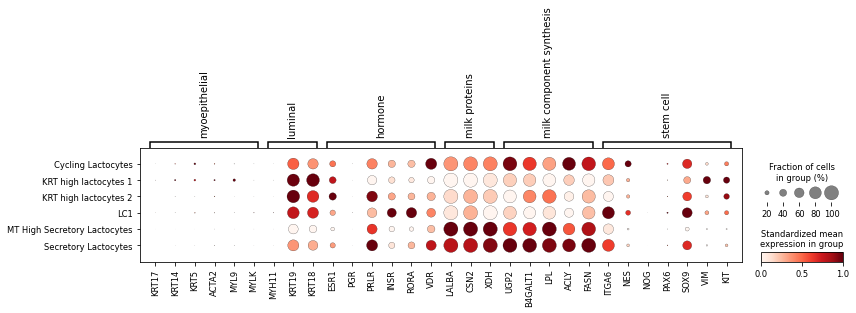

In [11]:
supervised_genes = {"myoepithelial":["KRT17","KRT14","KRT5","ACTA2","MYL9","MYLK"],
"luminal":["MYH11","KRT19","KRT18"],
"hormone":["ESR1","PGR","PRLR","INSR","RORA","VDR"],
 "milk proteins":["LALBA","CSN2","XDH"],
 "milk component synthesis":["UGP2","B4GALT1","LPL","ACLY","FASN"],
 "stem cell":["ITGA6", "NES", "NOG", "PAX6", "SOX9", "VIM","KIT"]}

sc.pl.dotplot(adata_all_epi,supervised_genes,groupby="Epithelial Cell Subclusters",standard_scale="var",colorbar_title='Standardized mean\nexpression in group',show=False)
plt.savefig(fig4_dir+"supervised_genes_by_subclusters_dotplot.pdf",bbox_inches="tight")


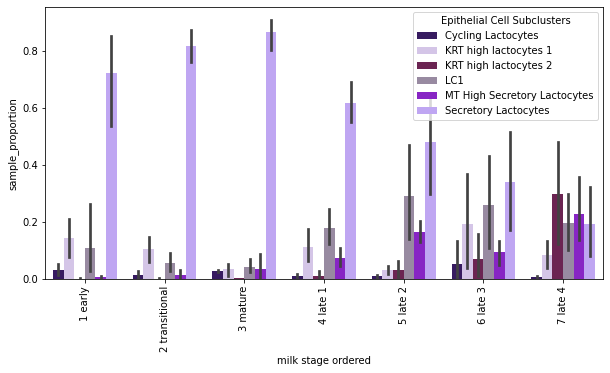

In [17]:
epi_sub_colors={"Cycling Lactocytes": "#350F6C","KRT high lactocytes 1":"#D3C0EC", 
               "KRT high lactocytes 2": "#771856","LC1":'#9986A5', ##6E398F
                "MT High Secretory Lactocytes":"#8D0BDE","Secretory Lactocytes":'#bb99ff'} #"#C179ED""#C3AED1"
bm.set_colors_from_dict(adata_all_epi,epi_sub_colors,'Epithelial Cell Subclusters')

ph.boxplot_sample_proportions(adata_all_epi,"sample","Epithelial Cell Subclusters",hue="milk stage ordered",plottype="bar",swap=True)

In [24]:
import importlib
importlib.reload(gh)

<module 'gene_enrichment_helpers' from '../helper_functions/gene_enrichment_helpers.py'>

In [6]:
genelist_references = gh.get_genelist_references()
metadata = bm.get_bm_metadata()

In [11]:
go_table_outdir = "../../Results/tables/Epithelial_Marker_Gene_GO_Results/"

35


../helper_functions/gene_enrichment_helpers.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_used["collapsed_into_geneset"] = ""
/afs/csail.mit.edu/u/n/nyquist/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


750


../helper_functions/gene_enrichment_helpers.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_used["collapsed_into_geneset"] = ""
/afs/csail.mit.edu/u/n/nyquist/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


142


../helper_functions/gene_enrichment_helpers.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_used["collapsed_into_geneset"] = ""
/afs/csail.mit.edu/u/n/nyquist/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


499


../helper_functions/gene_enrichment_helpers.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_used["collapsed_into_geneset"] = ""
/afs/csail.mit.edu/u/n/nyquist/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


96


../helper_functions/gene_enrichment_helpers.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go_used["collapsed_into_geneset"] = ""
/afs/csail.mit.edu/u/n/nyquist/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0


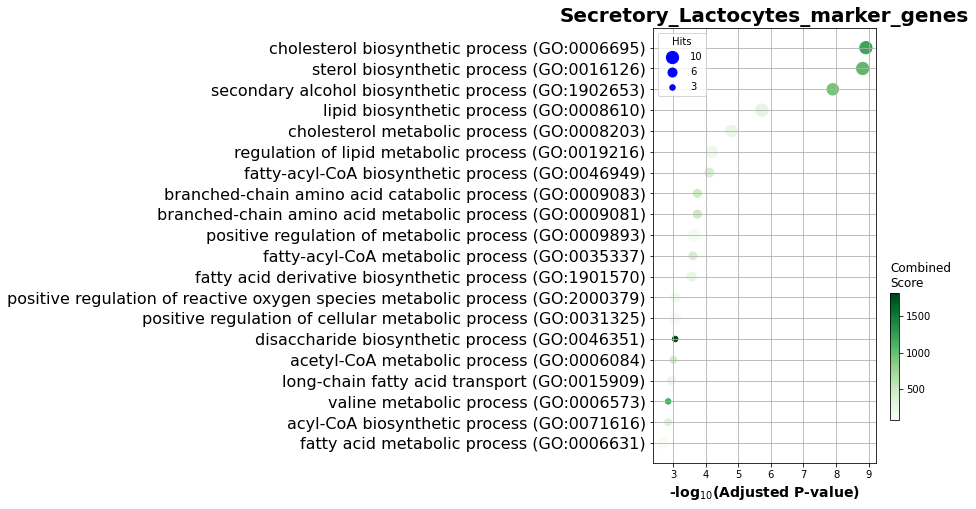

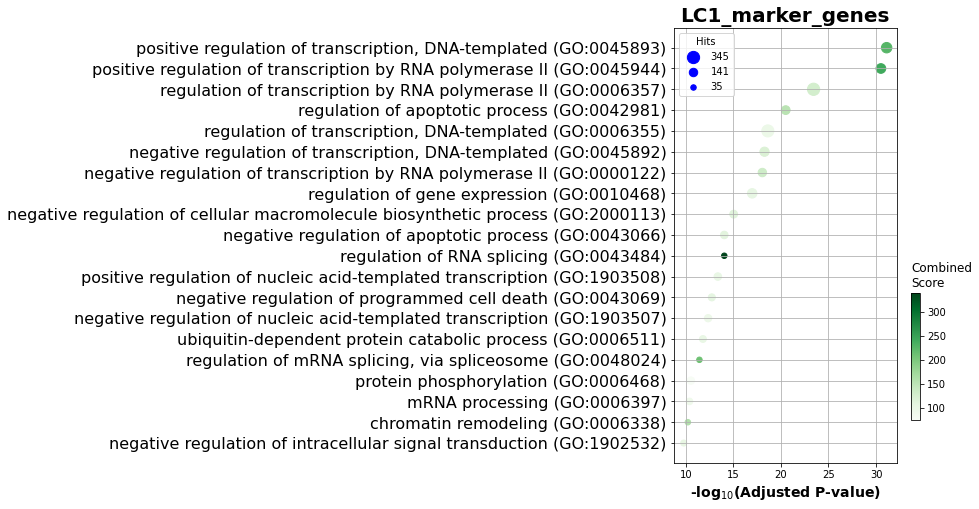

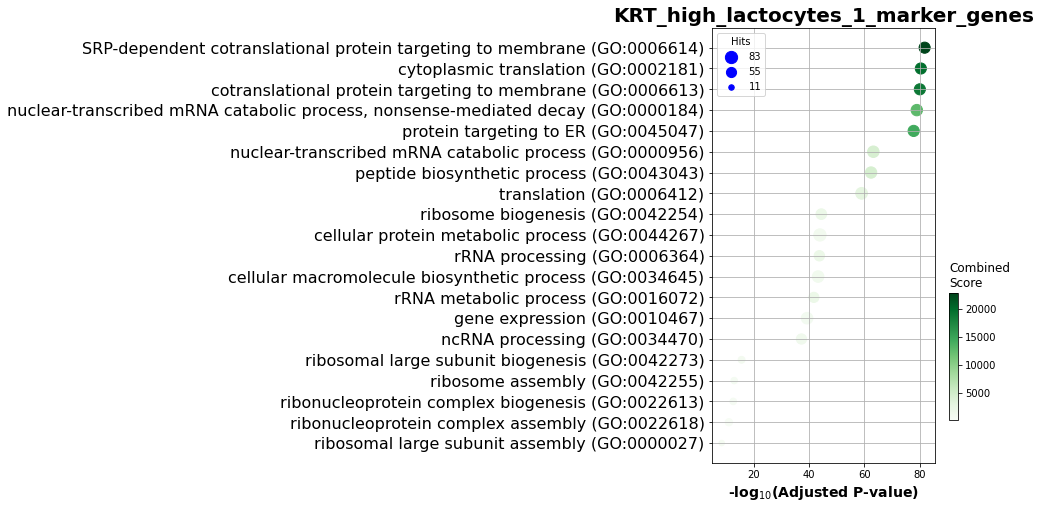

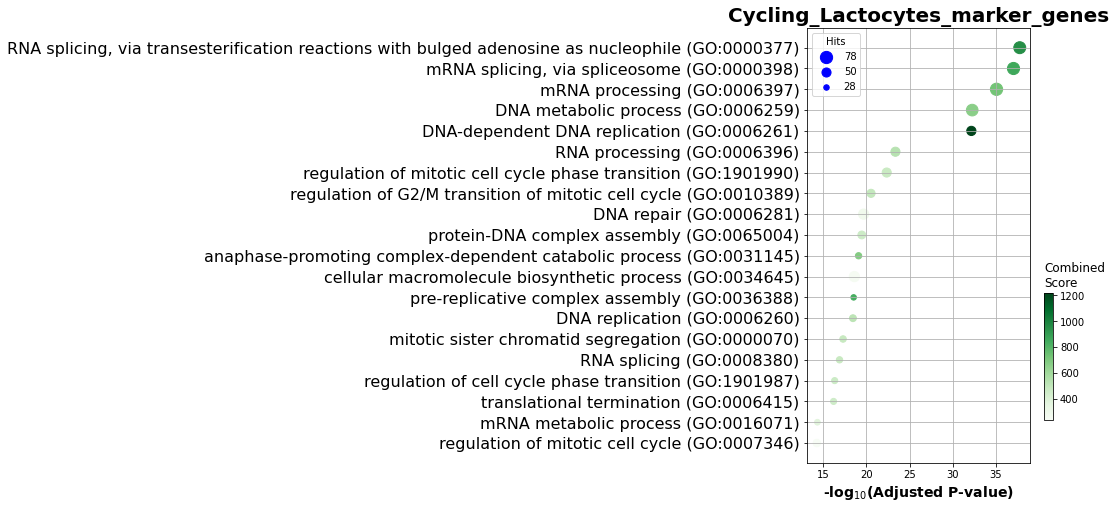

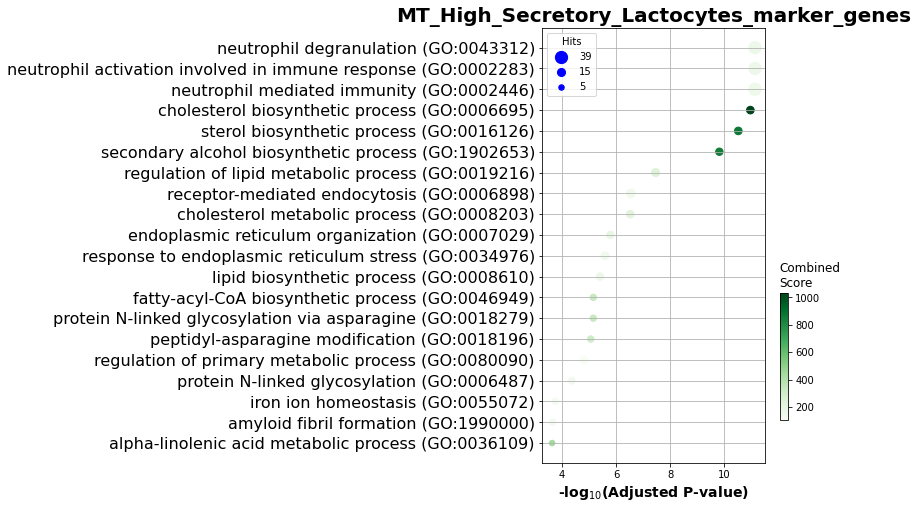

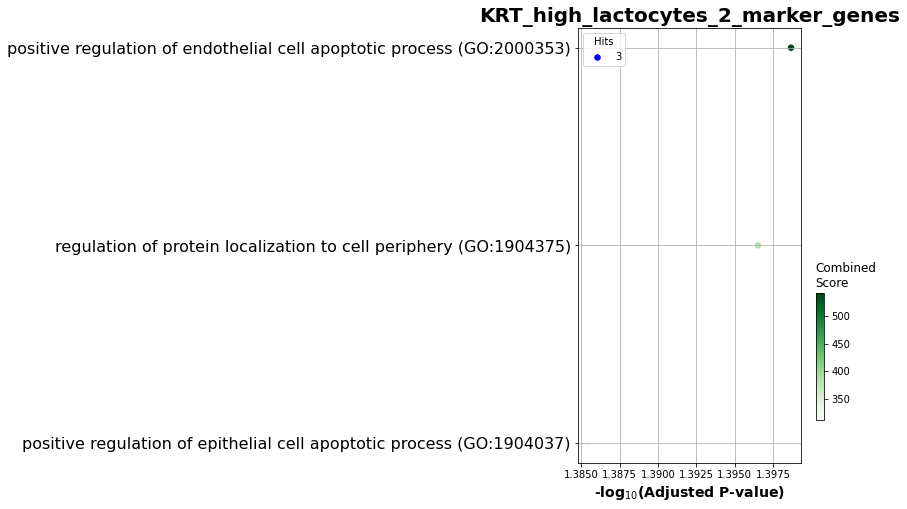

In [13]:
top_hits = set()
collapsed_lists = {}
# this runs enrichr analysis, saves the output GO enrichment results, and creates a gene set score for each GO term
# this takes a super long time to run because of all the gene set scores
for celltype in adata_all_epi.obs["Epithelial Cell Subclusters"].unique():
    enr,collapsed_list,GO_hits=gh.collapsed_enrichr_analysis(adata_all_epi,list(filtered_degenes[celltype].index),celltype,celltype.replace(" ","_")+"_marker_genes",genelist_references=genelist_references, metadata=metadata, overlap_threshold=0.8,go_res_dir=go_table_outdir)
    collapsed_lists[celltype] = collapsed_list
    top_hits = top_hits.union(collapsed_list)

In [14]:

geneset_metadata = gh.make_GO_term_metadata(adata_all_epi, group_column = "Epithelial Cell Subclusters")

In [15]:
#collapsed by 80% overlap
top_hits = set()
collapsed_lists = {}
overlap_infos = {}
gene_set="GO_Biological_Process_2021"
for celltype in adata_all_epi.obs["Epithelial Cell Subclusters"].unique():
    genelist_use = list(filtered_degenes[celltype].index)
    enr=gp.enrichr(gene_list=genelist_use,gene_sets=gene_set, organism="human")
    enr.res2d["n_genes"] = [len(i.split(";")) for i in enr.res2d["Genes"]]
    GO_hits = list(enr.res2d.loc[(enr.res2d["n_genes"]>=5)&(enr.res2d["Adjusted P-value"]<=.05),"Term"])
    if celltype in [ 'LC1']:
        overlap_threshold = 0.4
    elif celltype in [ 'Cycling Lactocytes']:
        overlap_threshold = 0.45
    else:
        overlap_threshold = 0.8
    overlap_info, collapsed_list=gh.collapse_GO_hits(GO_hits, enr,overlap_threshold =overlap_threshold)
    collapsed_lists[celltype] = collapsed_list
    overlap_infos[celltype] = overlap_info
    top_hits = top_hits.union(collapsed_list)

24
703
128
448
79
0


In [16]:
overlap_threshold = 0.6
merged_overlap_info = {}
for celltype,info in overlap_infos.items():
    for g in info:
        found_overlap = False
        genes = info[g]["Genes"]
        #print(genes)
        genelist_len = len(genes)
        if g not in merged_overlap_info:
            max_overlap = 0
            max_overlap_key = ""
            for s in merged_overlap_info:

                overlap = len(set(genes).intersection(merged_overlap_info[s]["Genes"]))
                if overlap>max_overlap and (1.0*overlap)/genelist_len > overlap_threshold:
                    found_overlap = True
                    max_overlap=overlap
                    max_overlap_key = s
            if found_overlap:       
                merged_overlap_info[max_overlap_key]["Genes"] = merged_overlap_info[max_overlap_key]["Genes"].union(genes)
                if celltype in merged_overlap_info[max_overlap_key]["listnames"]:
                    merged_overlap_info[max_overlap_key]["listnames"][celltype]+= info[g]["listnames"]
                    merged_overlap_info[max_overlap_key]["combined_scores"][celltype] += info[g]["combined_scores"]
                else:
                    merged_overlap_info[max_overlap_key]["listnames"][celltype]= info[g]["listnames"]
                    merged_overlap_info[max_overlap_key]["combined_scores"][celltype] = info[g]["combined_scores"]
                
            if not found_overlap:
                merged_overlap_info[g] = {}
                merged_overlap_info[g]["Genes"] = set(genes)
                merged_overlap_info[g]["listnames"] = {celltype:info[g]["listnames"]}
                merged_overlap_info[g]["combined_scores"] = {celltype:info[g]["combined_scores"]}
                merged_overlap_info[g]["parents"] = set()
        elif g in merged_overlap_info:
            merged_overlap_info[g]["Genes"] = merged_overlap_info[g]["Genes"].union(genes)
            if celltype in merged_overlap_info[g]["listnames"]:
                    merged_overlap_info[g]["listnames"][celltype]+= info[g]["listnames"]
                    merged_overlap_info[g]["combined_scores"][celltype] += info[g]["combined_scores"]
            else:
                    merged_overlap_info[g]["listnames"][celltype]= info[g]["listnames"]
                    merged_overlap_info[g]["combined_scores"][celltype] = info[g]["combined_scores"]
    

In [17]:
pathways_use = set()
for pathway in merged_overlap_info:
    all_ct_this_pathway = list(merged_overlap_info[pathway]["listnames"].keys())
    for ct in merged_overlap_info[pathway]["listnames"]:
        other_pathways = list(set(merged_overlap_info[pathway]["listnames"][ct]).intersection(set(geneset_metadata.index)))
        fcs = geneset_metadata.loc[other_pathways].loc[geneset_metadata.loc[other_pathways]["max score celltype"]==ct]["std"]
        if len(fcs) > 0:
            
            pathway_added = fcs.idxmax()
            
            pathways_use.add(pathway_added)
        krt2 = geneset_metadata.loc[other_pathways].loc[geneset_metadata.loc[other_pathways]["max score celltype"]=="KRT high lactocytes 2"]["std"]
        if len(krt2) > 0:
            pathways_use.add(krt2.idxmax())

In [18]:
parents_and_children = gh.build_parents_and_children_dict(geneset_metadata, genelist_references,overlap_threshold=0.4)

In [19]:
reduced_by_parents = gh.collapse_by_parents(parents_and_children, geneset_metadata, pathways_use)

In [21]:
final_genesets = []
final_genesets += list(geneset_metadata.loc[reduced_by_parents].loc[geneset_metadata.loc[reduced_by_parents,"max score celltype"]=="Secretory Lactocytes"].index)
final_genesets += list(geneset_metadata.loc[reduced_by_parents].loc[geneset_metadata.loc[reduced_by_parents,"max score celltype"]=="MT High Secretory Lactocytes"].index)
genelist_use = list(filtered_degenes["KRT high lactocytes 1"].index)
enr=gp.enrichr(gene_list=genelist_use,gene_sets=gene_set, organism="human")
final_genesets +=list(enr.res2d.loc[enr.res2d["Term"].isin(geneset_metadata.loc[reduced_by_parents].loc[geneset_metadata.loc[reduced_by_parents,"max score celltype"]=="KRT high lactocytes 1"].index)].sort_values("Combined Score",ascending=False).head(15)["Term"].values)
genelist_use = list(filtered_degenes["LC1"].index)
enr=gp.enrichr(gene_list=genelist_use,gene_sets=gene_set, organism="human")
final_genesets +=list(enr.res2d.loc[enr.res2d["Term"].isin(geneset_metadata.loc[reduced_by_parents].loc[geneset_metadata.loc[reduced_by_parents,"max score celltype"]=="LC1"].index)].sort_values("Combined Score",ascending=False).head(15)["Term"].values)
genelist_use = list(filtered_degenes["Cycling Lactocytes"].index)
enr=gp.enrichr(gene_list=genelist_use,gene_sets=gene_set, organism="human")
final_genesets +=list(enr.res2d.loc[enr.res2d["Term"].isin(geneset_metadata.loc[reduced_by_parents].loc[geneset_metadata.loc[reduced_by_parents,"max score celltype"]=="Cycling Lactocytes"].index)].sort_values("Combined Score",ascending=False).head(10)["Term"].values)
genelist_use = list(filtered_degenes["KRT high lactocytes 2"].index)
enr=gp.enrichr(gene_list=genelist_use,gene_sets=gene_set, organism="human")
final_genesets +=list(enr.res2d.loc[enr.res2d["Term"].isin(geneset_metadata.loc[reduced_by_parents].loc[geneset_metadata.loc[reduced_by_parents,"max score celltype"]=="KRT high lactocytes 2"].index)].sort_values("Combined Score",ascending=False).head(10)["Term"].values)

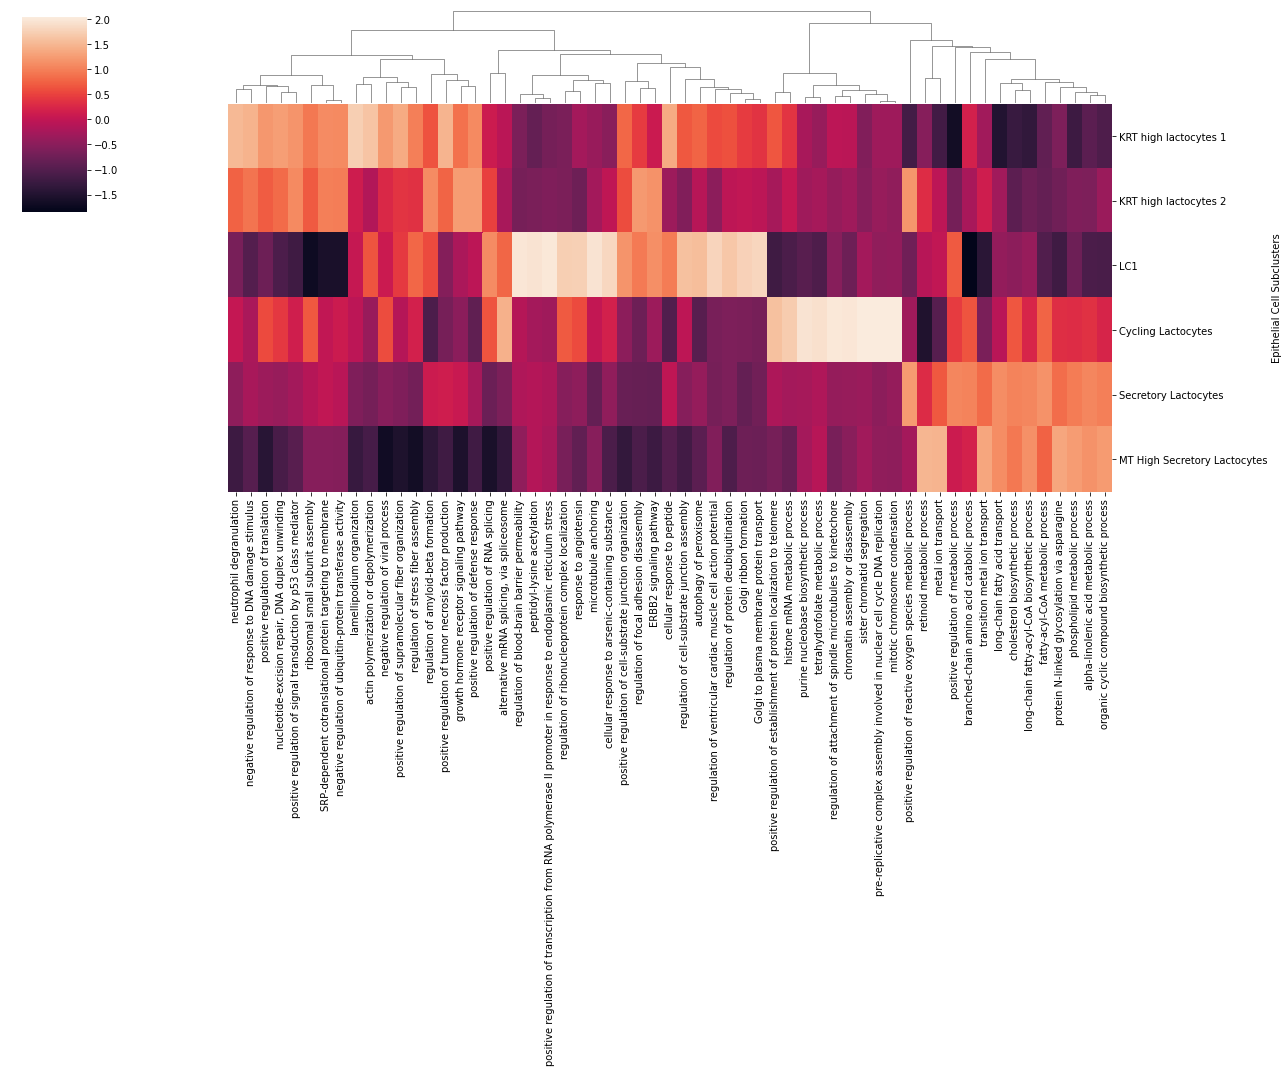

In [25]:
celltype_order = ["KRT high lactocytes 1","KRT high lactocytes 2","LC1","Cycling Lactocytes","Secretory Lactocytes", "MT High Secretory Lactocytes"]
df =adata_all_epi.obs[["Epithelial Cell Subclusters",]+list(final_genesets)].groupby(["Epithelial Cell Subclusters"]).mean().loc[celltype_order]
df.columns = [i.split(" (")[0] for i in df.columns]
sns.clustermap(df,figsize=(18,15),z_score=1,row_cluster=False,xticklabels=True)
plt.savefig(fig4_dir+"epi_subcluster_enrichr_heatmap_collapsed.pdf", bbox_inches="tight")